In [25]:
! pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Skipping, found downloaded files in "./emotion-detection-fer" (use force=True to force download)


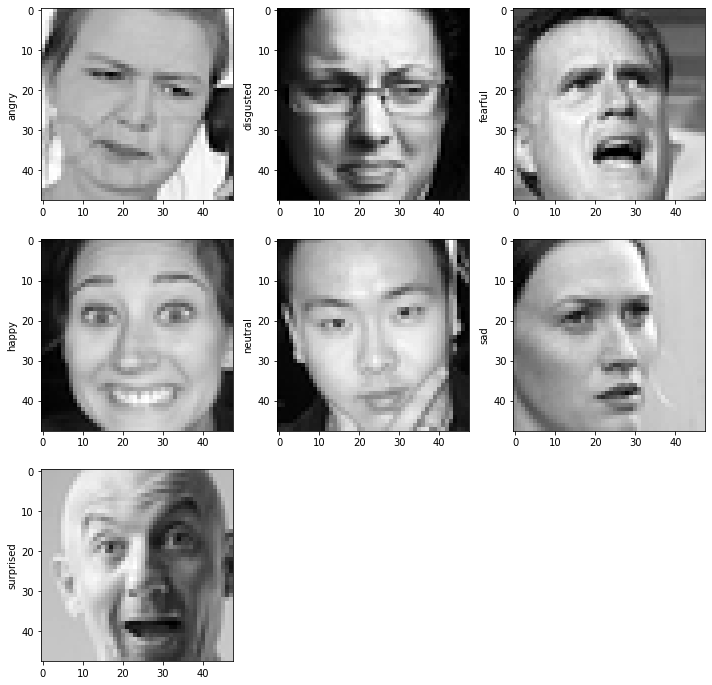

In [26]:
import opendatasets as od
import pandas
from PIL import Image
import matplotlib.pyplot as plt 
import numpy as np 
import os
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Dropout,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam


od.download("https://www.kaggle.com/datasets/ananthu017/emotion-detection-fer/code")

test_folder = "emotion-detection-fer/test/"
train_folder = "emotion-detection-fer/train/"

emotions = { 0 : "angry", 
             1 : "disgusted" , 
             2 : "fearful" , 
             3 : "happy" , 
             4 : "neutral" , 
             5 : "sad", 
             6 : "surprised"}

plt.figure(figsize=(12,12))

for cle,val in emotions.items():
	plt.subplot(3,3,cle+1)
	l_files = os.listdir(train_folder+val)
	k = np.random.randint(0, len(l_files))
	img = Image.open(train_folder+val+"/"+l_files[k])
	plt.imshow(img, cmap='gray')
	plt.ylabel(val)



In [27]:
b_size = 32
pic_size = 48

# create a data generator
datagen = ImageDataGenerator()

# prepare an iterators for each dataset
train_it = datagen.flow_from_directory(train_folder,
                                       class_mode='categorical',
                                       batch_size=b_size,
                                       target_size = (pic_size,pic_size),
                                       shuffle = True,
                                       color_mode = "grayscale")
test_it = datagen.flow_from_directory(test_folder,
                                      class_mode='categorical',
                                      batch_size=b_size,
                                      target_size = (pic_size,pic_size),
                                      shuffle = False,
                                      color_mode = "grayscale")




Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [28]:
model = Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected 2st layer
model.add(Dense(64))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(7))
model.add(Activation('softmax'))

opt = Adam(learning_rate = 0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_4 (Batc  (None, 48, 48, 64)       256       
 hNormalization)                                                 
                                                                 
 activation_5 (Activation)   (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 24, 24, 64)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 128)      

In [29]:
epochs = 25

history = model.fit(train_it,
                    steps_per_epoch=train_it.n//train_it.batch_size,
                    epochs=epochs,
                    validation_data = test_it,
                    validation_steps = test_it.n//test_it.batch_size,
                    )

Epoch 1/25
897/897 [==============================] - 22s 23ms/step - loss: 1.8777 - accuracy: 0.2960 - val_loss: 1.5452 - val_accuracy: 0.4182
Epoch 2/25
897/897 [==============================] - 14s 16ms/step - loss: 1.5778 - accuracy: 0.3968 - val_loss: 1.4066 - val_accuracy: 0.4639
Epoch 3/25
897/897 [==============================] - 14s 16ms/step - loss: 1.4581 - accuracy: 0.4432 - val_loss: 1.3266 - val_accuracy: 0.4944
Epoch 4/25
897/897 [==============================] - 14s 16ms/step - loss: 1.3740 - accuracy: 0.4758 - val_loss: 1.3213 - val_accuracy: 0.4965
Epoch 5/25
897/897 [==============================] - 15s 16ms/step - loss: 1.3143 - accuracy: 0.4988 - val_loss: 1.4011 - val_accuracy: 0.4780
Epoch 6/25
897/897 [==============================] - 14s 16ms/step - loss: 1.2647 - accuracy: 0.5206 - val_loss: 1.2211 - val_accuracy: 0.5319
Epoch 7/25
897/897 [==============================] - 14s 16ms/step - loss: 1.2236 - accuracy: 0.5371 - val_loss: 1.2200 - val_accuracy:

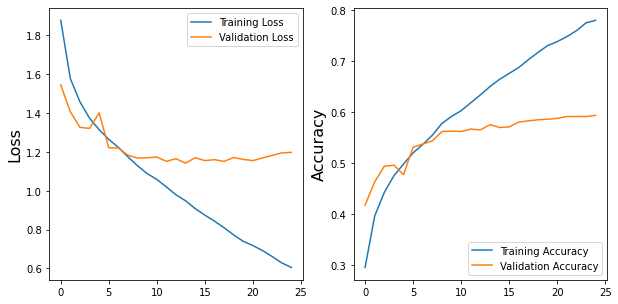

In [30]:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [31]:
pred = model.predict(test_it, steps=test_it.n//test_it.batch_size)
yhat = np.argmax(pred,1)

y = test_it.classes[:7168]





224/224 [==============================] - 2s 10ms/step


In [32]:
n = sum(y == yhat)

print(n/len(y))


0.5941685267857143


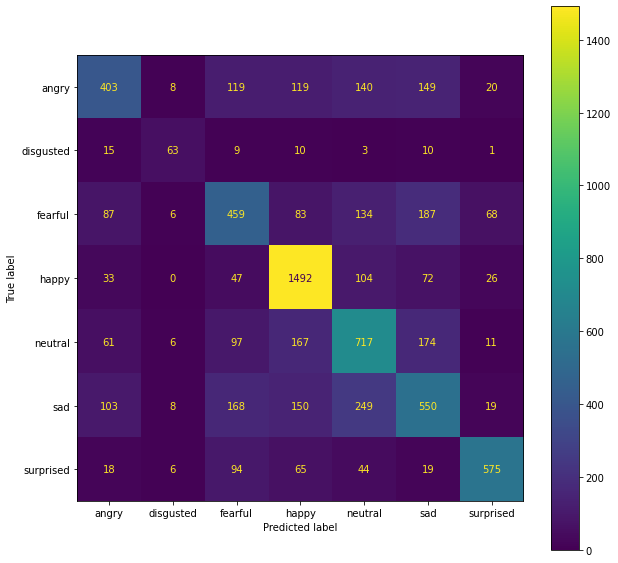

In [33]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

keys = ['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']

cm = confusion_matrix(y, yhat, labels=range(7))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=keys)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax)